Задание 

Создайте список, состоящий из значений от 0 до 99 включительно. Рассчитайте среднеквадратическое отклонение, используя np.std(). При расчете используйте поправку на число степеней свободы. Ответ округлите до тысячных. В качестве десятичного разделителя используйте точку.

Hint: параметр ddof=1

In [1]:
import numpy as np

round((np.std(list(range(0, 100)), ddof=1)),3)

29.011

Проект. Исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.

Задания 
1.Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.
2.Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
3.На каких платформах произошло больше всего релизов?
4.Игры каких издателей (Publisher) встречаются в датасете чаще всего?
5.В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
6.Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
7.Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

 Описание данных
 Имеются следующие поля:

 Rank – место по объему продаж.
 
 Name – название игры.
 
 Platform – платформа, на которой выпущена игра.
 
 Year – год релиза.
 
 Genre – жанр.
 
 Publisher – издатель.
 
 NA_Sales – продажи в Северной Америке, в млн.
 
 EU_Sales – продажи в Европе, в млн.
 
 JP_Sales – продажи в Японии, в млн.
 
 Other_Sales – продажи в остальном мире, в млн.
 
 Global_Sales – продажи по всему миру, в млн.
 

In [2]:
import pandas as pd
import datetime
import vk_api
import os
import requests
import json
import random

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys

1.Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.


In [3]:
file_path = '/home/jupyter-i-petrov/Statistika/games.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')


In [4]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [9]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [10]:
df.Rank.describe()

count    16291.000000
mean      8290.190228
std       4792.654450
min          1.000000
25%       4132.500000
50%       8292.000000
75%      12439.500000
max      16600.000000
Name: Rank, dtype: float64

4.Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [11]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


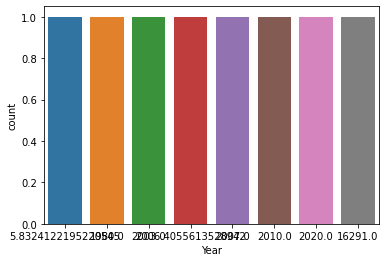

In [12]:
sns.countplot(df.Year.describe())

In [13]:
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [14]:
after_2007= df.query('Year > 2007').shape[0]
after_all = df.shape[0]
(after_2007/after_all)*100

49.063900313056294

In [15]:
Year = df.Year.describe()

In [16]:
Year

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [17]:
Year_1=df.query('Year > 2007').describe()

In [18]:
Year_1

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000
mean,8785.324909,2010.909546,0.225566,0.151949,0.052660,0.053408,0.483748
std,4854.600705,2.409254,0.648457,0.473275,0.231897,0.158331,1.316281
min,3.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4598.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.050000
50%,8993.000000,2010.000000,0.070000,0.020000,0.000000,0.010000,0.150000
75%,13082.000000,2013.000000,0.200000,0.130000,0.030000,0.040000,0.420000
max,16599.000000,2020.000000,15.850000,12.880000,5.650000,4.140000,35.820000


In [19]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [20]:
scipy.stats.mode(df.Year)

ModeResult(mode=array([2009.]), count=array([1431]))

In [21]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [22]:
year = df.groupby('Year', as_index=False).agg({'Name':'count'})

In [23]:
year.describe()

,Year,Name
count,39.000000,39.000000
mean,1999.051282,417.717949
std,11.493588,450.905344
min,1980.000000,1.000000
25%,1989.500000,19.000000
50%,1999.000000,289.000000
75%,2008.500000,699.500000
max,2020.000000,1431.000000


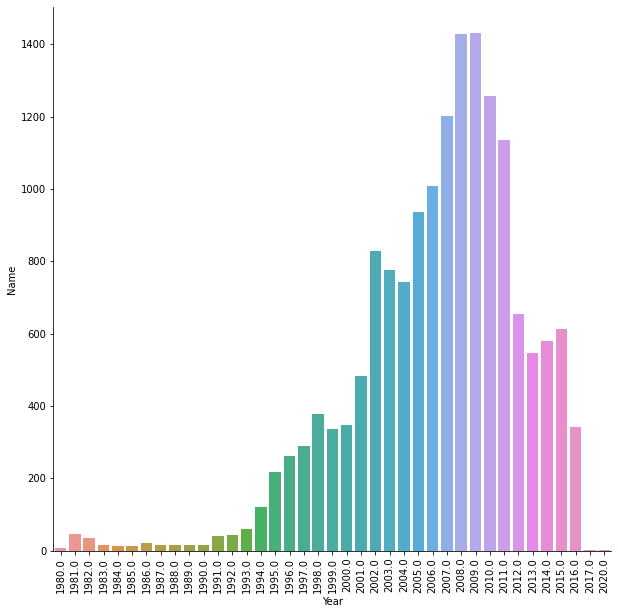

In [24]:
plt.figure(figsize=(10,10))
ax=sns.barplot(x=year.Year,
              y=year.Name,
              hue=None,
              data=year)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
sns.despine()

In [25]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [26]:
scipy.stats.mode(df.Year)

ModeResult(mode=array([2009.]), count=array([1431]))

5.На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

Пример: 

'Wii', 'NES', 'GB'

In [27]:
platform_1=df.value_counts('Platform', normalize=True)*100
platform_1.to_frame('platform').query('platform > 7').index.tolist()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

6.Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [28]:
scipy.stats.mode('Publisher')

ModeResult(mode=array(['Publisher'], dtype='<U9'), count=array([1]))

In [29]:
df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Paradox Development                1
Technos Japan Corporation          1
Panther Software                   1
Activision Blizzard                1
CPG Products                       1
Name: Publisher, Length: 576, dtype: int64

In [30]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [31]:
#1339

7.Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

Hint: mean, median, std. Переменные: NA_sales и т.д. для нужных регионов.

In [32]:
df_1=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].agg(['mean', 'median', 'std'])

In [33]:
df_1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,0.265647,0.147731,0.078833,0.048426,0.540910
median,0.080000,0.020000,0.000000,0.010000,0.170000
std,0.822432,0.509303,0.311879,0.190083,1.567345


In [34]:
df.query("Genre in ('Fighting')").agg(['mean'])

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,7621.746411,2004.630383,0.264043,0.119617,0.104246,0.043289,0.53116


In [35]:
df.query("Genre in ('Simulation')").agg(['mean']) 


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,8572.345519,2006.554245,0.214363,0.133278,0.074929,0.036981,0.459882


In [36]:
#NA (North America)

8.Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

по оси x будет расположен жанр игры (Genre)
по оси у – объем продаж в Японии (JP_sales)
Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

Hint: sns.boxplot(). Для удобства можете изменить размер графика, например: plt.figure(figsize=(16,16))

In [37]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [38]:
#df_3 = df.query('Publisher == "Nintendo"')\
#         .groupby('Genre',as_index = False)

In [114]:
df_Nintendo_2 = df.query("Publisher=='Nintendo'")\
                  .groupby(["JP_Sales", "Genre"], as_index=False)\
                  .agg({'JP_Sales': 'sum'})

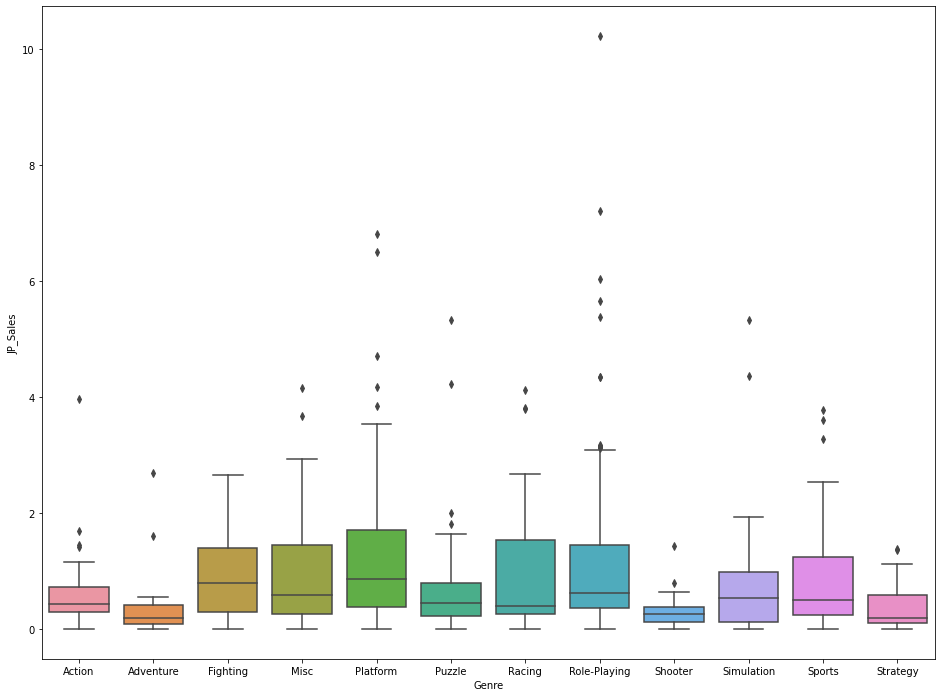

In [119]:
plt.figure(figsize=(16,12))
sns.boxplot(x = 'Genre', y = 'JP_Sales' , data = df_Nintendo_2)

In [133]:
df.query("Publisher=='Nintendo'")\
    .query("Genre in ('Fighting')")\
    .agg(['median'])                           # медиана Fighting  0.5

#.groupby(["JP_Sales", "Genre"])\

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
median,1425.0,2002.0,0.565,0.17,0.5,0.035,1.52


In [134]:
df.query("Publisher=='Nintendo'")\
    .query("Genre in ('Fighting')")\
    .agg(['mean'])                               #среднее значение  Fighting 0.83

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,2614.222222,2001.722222,1.505556,0.48,0.83,0.147222,2.963889


In [122]:
df.query("Genre in ('Fighting')").agg(['mean']) #среднее значение

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,7621.746411,2004.630383,0.264043,0.119617,0.104246,0.043289,0.53116


In [135]:
df.query("Publisher=='Nintendo'")\
    .query("Genre in ('Simulation')")\
    .agg(['median'])                      #медиана  Simulation  0.39

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
median,1807.5,2006.5,0.47,0.195,0.39,0.035,1.13


In [136]:
df.query("Publisher=='Nintendo'")\
    .query("Genre in ('Simulation')")\
    .agg(['mean'])                         #среднее значение Simulation 0.8446

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,3464.357143,2005.571429,1.060714,0.930357,0.844643,0.209286,3.044643


In [121]:
df.query("Genre in ('Simulation')").agg(['median']) # медиана

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
median,8596.5,2008.0,0.07,0.01,0.0,0.01,0.16


In [123]:
df.query("Genre in ('Simulation')").agg(['mean']) #среднее значение

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,8572.345519,2006.554245,0.214363,0.133278,0.074929,0.036981,0.459882


9.Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени было продано наибольшее количество копий игр жанра Sports? Иными словами, выберите отрезок, который включает в себя несколько крупных пиков.

In [96]:
df_Nintendo = df.query("Publisher=='Nintendo'")\
                .query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")\
                .groupby(['Year', 'Genre'], as_index=False)

In [97]:
df_Nintendo 

In [98]:
df_Nintendo_1 = df.query("Publisher=='Nintendo'")\
                .query("Genre in ( 'Sports')").value_counts()

In [104]:
df_Nintendo_2 = df.query("Publisher=='Nintendo'")\
                  .query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")\
                  .groupby(["Year", "Genre"], as_index=False)\
                  .agg({'Global_Sales': 'sum'})

In [105]:
df_Nintendo_2 

,Year,Genre,Global_Sales
0,1983.0,Platform,5.62
1,1983.0,Sports,3.20
2,1984.0,Racing,5.68
3,1984.0,Sports,6.18
4,1985.0,Platform,43.17
...,...,...,...
109,2014.0,Sports,0.88
110,2015.0,Platform,5.24
111,2015.0,Simulation,2.98
112,2015.0,Sports,0.45


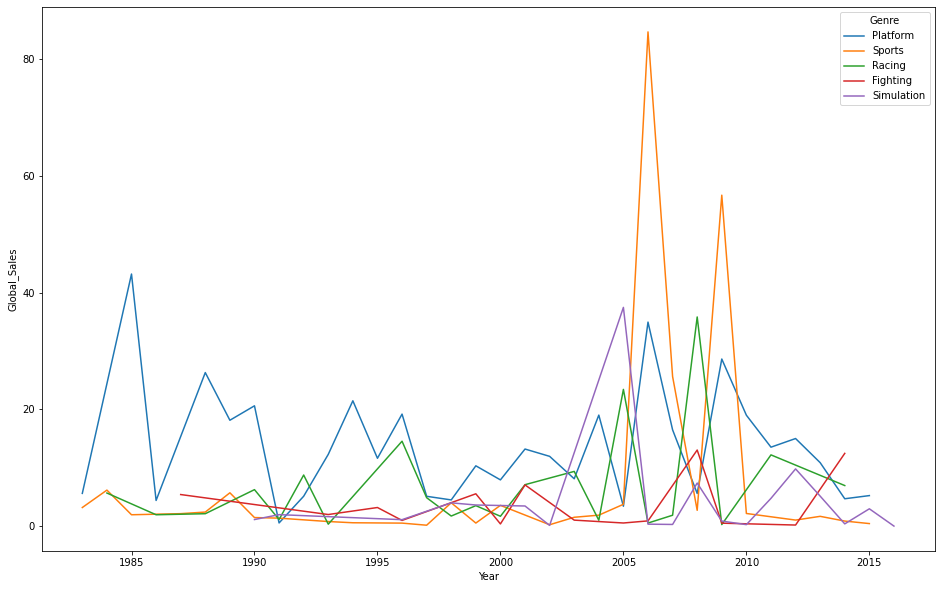

In [110]:
plt.figure(figsize=(16,10))
sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Genre', data = df_Nintendo_2)


In [ ]:
# 2005-2010